<a href="https://colab.research.google.com/github/ShreyJais/Quantum-Computing/blob/main/2348558_QC_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00


In [4]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b116fcab4998662f2f9c0e42efc1a11c8db484d23e45ed1df4dd7ad659e7c7ca
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.primitives import Sampler
import numpy as np
import matplotlib.pyplot as plt

Design quantum circuit for the operations HSHT and check the output for the two basic input qubits.

In [6]:
def create_hsht_circuit(initial_state=0):
  qc = QuantumCircuit(1)
  #HSHT
  qc.h(0)
  qc.s(0)
  qc.h(0)
  qc.t(0)

  return qc

Circuit for |0⟩ input:


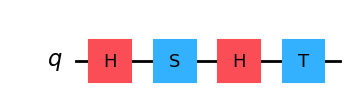

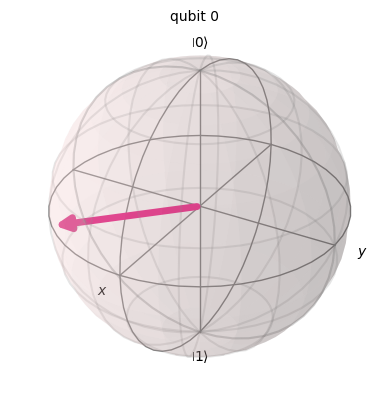

<Figure size 640x480 with 0 Axes>


Circuit for |1⟩ input:


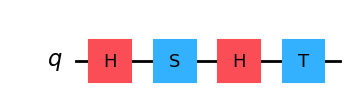

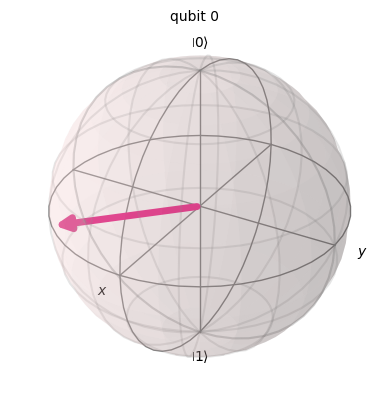

<Figure size 640x480 with 0 Axes>

In [7]:
#|0⟩ and |1⟩ inputs
qc_0 = create_hsht_circuit(0)
qc_1 = create_hsht_circuit(1)

print("Circuit for |0⟩ input:")
display(qc_0.draw('mpl'))

state_0 = Statevector.from_instruction(qc_0)
state_1 = Statevector.from_instruction(qc_1)

fig_0 = plot_bloch_multivector(state_0)
plt.suptitle('Final state for |0⟩ input')
display(fig_0)
plt.show()
print("\nCircuit for |1⟩ input:")
display(qc_1.draw('mpl'))

fig_1 = plot_bloch_multivector(state_1)
plt.suptitle('Final state for |1⟩ input')
display(fig_1)
plt.show()

Input State:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Output State:
Statevector([1.+0.00000000e+00j, 0.+7.85046229e-17j],
            dims=(2,))
Identity matrix:
[[1. 0.]
 [0. 1.]]
Operation matrix after applying Inverse HSHT:
[[1.+0.j 0.-0.j]
 [0.+0.j 1.+0.j]]

Is HSHT reversible? True


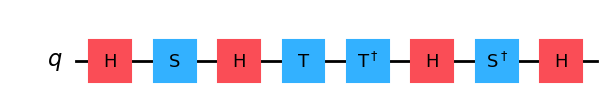

In [8]:
def check_reversibility():
    qc = QuantumCircuit(1)
    #HSHT
    qc.h(0)
    qc.s(0)
    qc.h(0)
    qc.t(0)
    # Inverse HSHT
    qc.tdg(0)  # Inverse T gate
    qc.h(0)    # Inverse H (which is H)
    qc.sdg(0)  # Inverse S gate
    qc.h(0)    # Inverse H (which is H)

    # Calculate input and output states
    input_state = Statevector.from_label('0')  # Assuming initial state is |0⟩
    output_state = input_state.evolve(qc)

    # Print input and output states
    print("Input State:")
    print(input_state)
    print("\nOutput State:")
    print(output_state)

    print("Identity matrix:")
    print(np.eye(2))

    op = Operator(qc)
    print("Operation matrix after applying Inverse HSHT:")
    print(np.round(op.data, 3))

    # Check if it's close to identity
    is_reversible = np.allclose(op.data, np.eye(2))
    print(f"\nIs HSHT reversible? {is_reversible}")
    return qc

Reverse_hsht = check_reversibility()
display(Reverse_hsht.draw('mpl'))

In [ ]:
def create_bell_circuit(input_state='00'):
    """Create a circuit to generate Bell states"""
    qc = QuantumCircuit(2, 2) # Create circuit with 2 qubits and 2 classical bits

    # Apply H and CNOT
    qc.h(0)
    qc.cx(0, 1)

    # Measure qubits to classical bits
    qc.measure([0, 1], [0, 1]) # Explicitly measure qubit 0 to classical bit 0 and qubit 1 to classical bit 1

    return qc

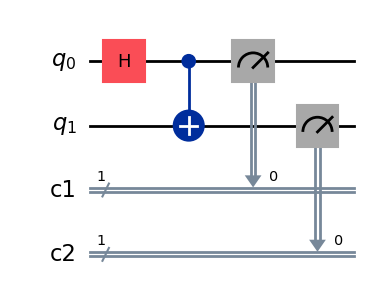

In [18]:
qc = QuantumCircuit(2)
c1 = ClassicalRegister(1, 'c1')
c2 = ClassicalRegister(1, 'c2')
qc.add_register(c1)
qc.add_register(c2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
display(qc.draw('mpl'))

<ipython-input-22-28e9007c7c5e>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(create_bell_circuit()).result()


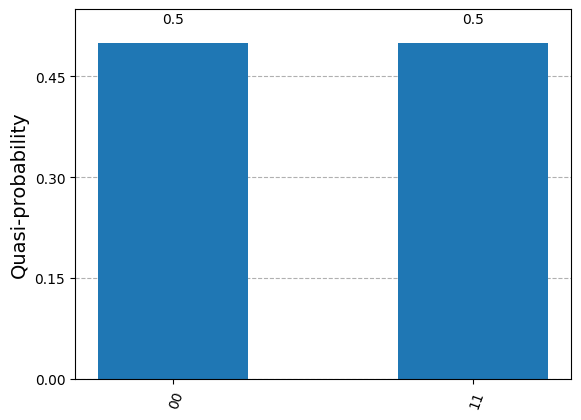

In [22]:
result = Sampler().run(create_bell_circuit()).result()
statistic = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistic))

In [20]:
def create_bell_circuit(input_state='00'):
    """Create a circuit to generate Bell states"""
    qc = QuantumCircuit(2)
    c1 = ClassicalRegister(1, 'c1')
    c2 = ClassicalRegister(1, 'c2')
    qc.add_register(c1)
    qc.add_register(c2)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc


Circuit for input |00⟩:


<ipython-input-21-c56bced89a14>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(bell_circuits[input_state]).result()


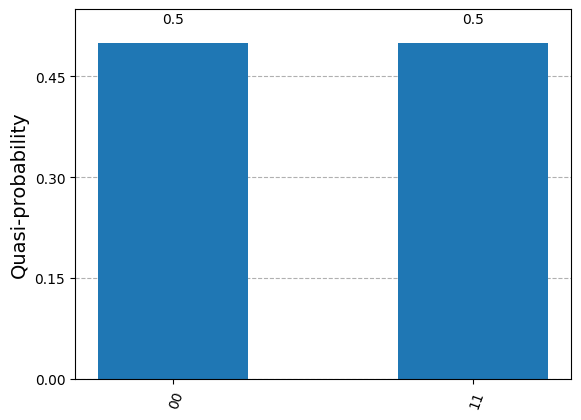

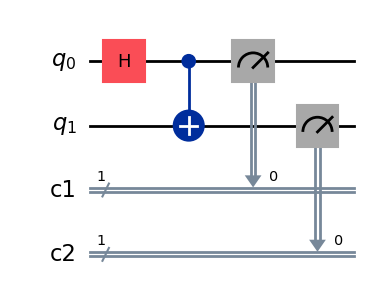


Circuit for input |01⟩:


<ipython-input-21-c56bced89a14>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(bell_circuits[input_state]).result()


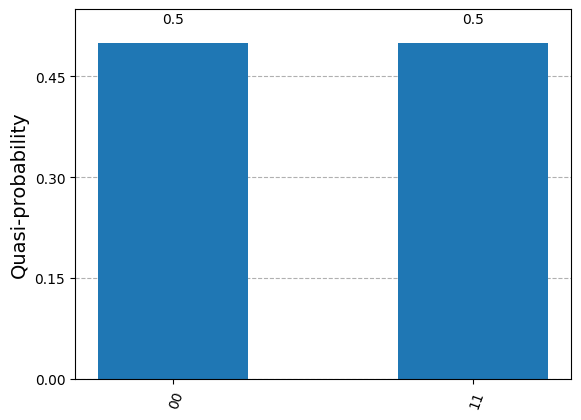

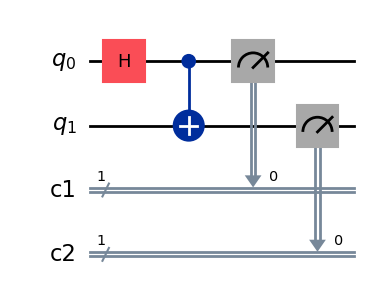


Circuit for input |10⟩:


<ipython-input-21-c56bced89a14>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(bell_circuits[input_state]).result()


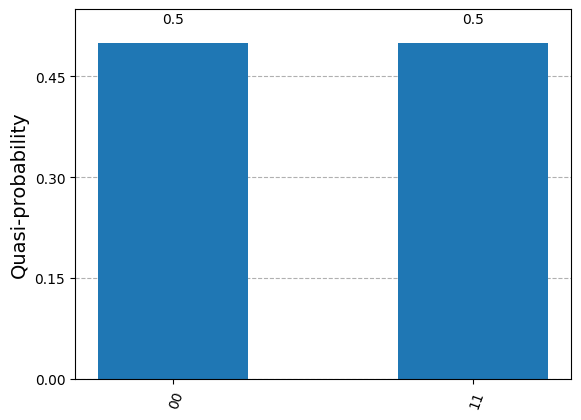

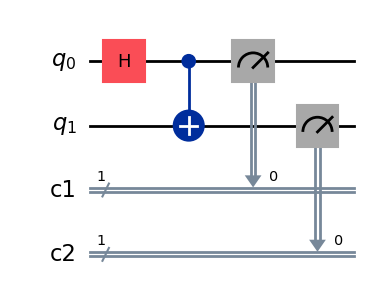


Circuit for input |11⟩:


<ipython-input-21-c56bced89a14>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(bell_circuits[input_state]).result()


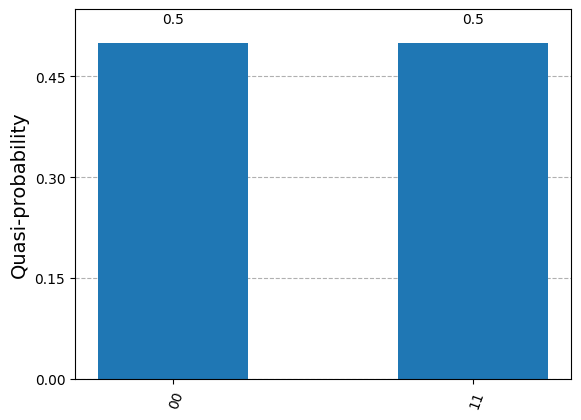

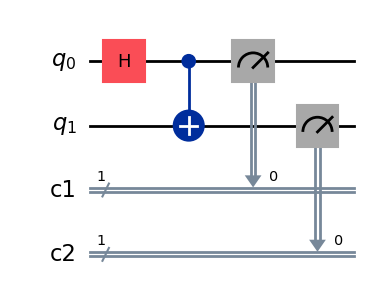

In [21]:
# Create circuits for all possible inputs
inputs = ['00', '01', '10', '11']
bell_circuits = {}
results = {}

for input_state in inputs:
    bell_circuits[input_state] = create_bell_circuit(input_state)
    print(f"\nCircuit for input |{input_state}⟩:")
    results = Sampler().run(bell_circuits[input_state]).result()
    statistic = results.quasi_dists[0].binary_probabilities()
    display(plot_histogram(statistic,title=f""))
    display(bell_circuits[input_state].draw('mpl'))